# Practical 2

## Optimization

In a neural network, the set of weights represents the experience and insights gained from the training process. The learning process depends on the use of a loss function and optimization process to find the best set of weights that minimizes the loss function.

In this session, we will take a closer look at the operations of _Stochastic Gradient Descent_ optimizer.

Consider the following equation:

$${y = (x-3)^2 + x}$$

The question is, __what is the value of x such that y is the smallest value possible?__

Since we know the equation, we can differentiate the equation and set it to 0.

$${\frac{dy}{dx} = 2(x-3) + 1 = 0}$$
$${x = 2.5}$$

In real-life, we do not know the equation, all we have are a bunch of data. There might exists an equation but it is too complex and may not be differentiable. So we have to rely on machines and optimizers to iteratively run an algorithm that finds the best value of x.

To illustrate, let us now use an optimizer to find the value of x. We will see if the optimizer is able to arrive at the true value of 2.5.


In [1]:
#Import TensorFlow
import tensorflow as tf

#Create an instance of Stochastic Gradient Descent (SGD) optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
#Initialize the x to be 1.0
x = tf.Variable(1.0)

#Define the function y = (x-3)^2 + x
y = lambda: tf.square(x-3) + x

#Iterate 20 times and see if we can get the value of x=2.5
for i in range(20):
    #Get the optimizer to minimize
    #optimizer.minimize(y, [x])
    # Use GradientTape to compute gradients of the lambda loss function
    with tf.GradientTape() as tape:
        loss_value = y()  # Call the lambda function to get the loss value

    # Compute gradients of the loss with respect to w and b
    gradients = tape.gradient(loss_value, [x])

    # Apply the gradients to update w and b
    optimizer.apply_gradients(zip(gradients, [x]))
#Print the value of x after 20 steps of optimization process
print(x.numpy())

2.482706


TensorBoard comes installed with TensorFlow and it allows us to visualize the training process.


In [2]:
import tensorflow as tf
import datetime
import os

# Create an instance of Stochastic Gradient Descent (SGD) optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
# Initialize the x to be zero
x = tf.Variable(1.0)

# Define the function y = (x-3)^2 + x
y = lambda: tf.square(x-3) + x

current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = os.path.join("logs", current_time)
print(log_dir)
summary_writer = tf.summary.create_file_writer(log_dir)


# Create an empty list
# Iterate 20 times and see if we can get the value of x=2.5
for i in range(20):
    #Get the optimizer to minimize
    #optimizer.minimize(y, [x])

    with tf.GradientTape() as tape:
      loss_value = y()  # Call the lambda function to get the loss value

    # Compute gradients of the loss with respect to w and b
    gradients = tape.gradient(loss_value, [x])

    # Apply the gradients to update w and b
    optimizer.apply_gradients(zip(gradients, [x]))
    with summary_writer.as_default():
      tf.summary.scalar("x", x.numpy(), step=i)
      tf.summary.scalar("loss", loss_value, step=i)

    
    #with summary_writer.as_default():
    #  tf.summary.scalar("x", x.numpy(), step=i)

summary_writer.flush()
summary_writer.close()

logs/20250211-224702


In [3]:
# If you have previously run tensorboard, you need to kill the previous process by running the below for Colab
!kill $(ps -e | grep 'tensorboard' | awk '{print $1}')

In [4]:
# If running in Windows, you can run the below to kill the previous process 
! powershell "echo 'checking for existing tensorboard processes'"
! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}"

! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}| %{kill $_}"

! powershell "echo 'cleaning tensorboard temp dir'"
! powershell "rm $env:TEMP\.tensorboard-info\*"

! powershell "ps | Where-Object {$_.ProcessName -eq 'tensorboard'}"

zsh:1: command not found: powershell
zsh:1: command not found: powershell
zsh:1: command not found: powershell
zsh:1: command not found: powershell
zsh:1: command not found: powershell
zsh:1: command not found: powershell


Display the tensorboard using the following commands

In [5]:
%reload_ext tensorboard
%tensorboard --logdir=logs/20250115-161918 #insert your directory 

### The Adam Optimizer

There are other optimizers available in TensorFlow, let us now try another optimizer call _Adam_, it is modified version of SGD and is very popular as an optimizer for deep learning.


Modify your codes and change the line

```python
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
```

to

```python
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
```

Re-run your codes and what do you see in the graph?  You should notice that it has overshot 2.5 and went above 2.6.

### Changing Learning Iterations

Increase the iteration from 20 to 100 by modifying the line:

```python
for i in range(20):
```

to

```python
for i in range(100):
```

Note how the values moved above 2.5 and falls back again, it oscillates around 2.5 and eventually settles at 2.5.

### Exercise (Effects of Learning Rate)

Change the number of iterations from 100 to 200 and re-run the codes with learning rates of 1, 0.5, 0.1, 0.05. 0.02 and 0.01.

What can you conclude about the effects of learning rates?

<details>
    <summary><strong>Click here for answer</strong></summary>
    
You will notice that with higher values of learning rate, the optimizer tends to overshoot and the value of x oscillates about the actual value. The larger the value of learning rate, the more it will overshoot and oscillates.
    
On the other hand, a smaller value of learning rate will prevent overshoot but it takes longer to advance during each step to reach the final value.
    
</details>

### Momentum

Very often, a graph has more then one minimums. The lowest minimum is called the global minimum while the rest are called the local minimums.

Take a look at the graph below:

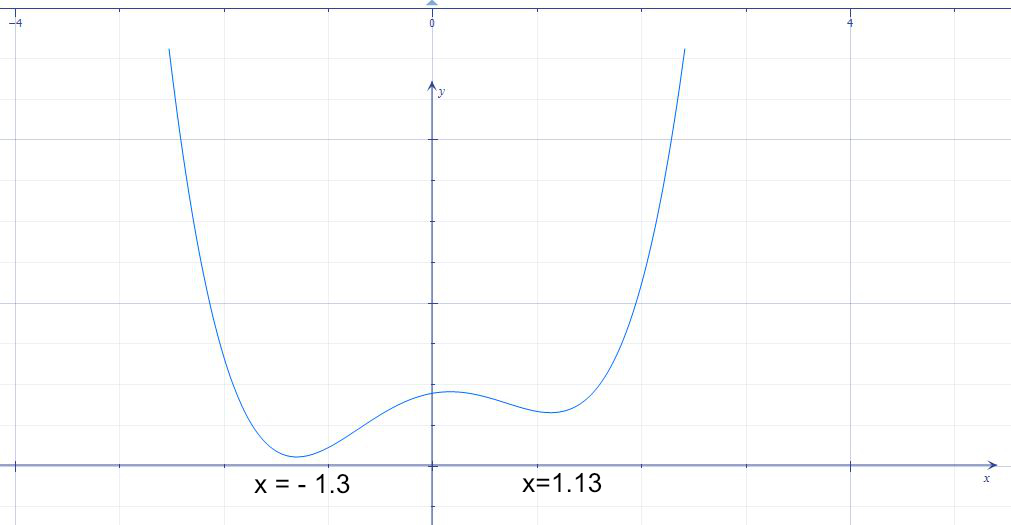

The equation of the graph is 

$${y = x^4 - 3x^2 + x + 4}$$

Notice that there are 2 minimums, one at about x=1.13 and the other at about x= -1.3. The true (global) minimum is when x = -1.3 while the local minimum is at x=1.13. Of course, the best solution is the global minimum.

Let us now see what happens when we try our optimizer with this graph.

Write some code to apply an SGD optimzer with a learning rate of 0.01 on this new graph, starting at x=2, and running for 50 iterations. Store the x values at each iteration in a list called values.

Ans:
```python
import tensorflow as tf
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
#Start our x at 2.0
x = tf.Variable(2.0)
y = lambda: tf.math.pow(x,4) - (3 * tf.square(x)) + x + 4
values = []
for i in range(50):
    #optimizer.minimize(y, [x])
    with tf.GradientTape() as tape:
        loss_value = y()  # Call the lambda function to get the loss value

    # Compute gradients of the loss with respect to w and b
    gradients = tape.gradient(loss_value, [x])

    # Apply the gradients to update w and b
    optimizer.apply_gradients(zip(gradients, [x]))

    values.append(x.numpy())
    
```

In [6]:
# insert code here
import tensorflow as tf
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
#Start our x at 2.0
x = tf.Variable(2.0)
y = lambda: tf.math.pow(x,4) - (3 * tf.square(x)) + x + 4
values = []
for i in range(50):
    #optimizer.minimize(y, [x])
    with tf.GradientTape() as tape:
        loss_value = y()  # Call the lambda function to get the loss value

    # Compute gradients of the loss with respect to w and b
    gradients = tape.gradient(loss_value, [x])

    # Apply the gradients to update w and b
    optimizer.apply_gradients(zip(gradients, [x]))

    values.append(x.numpy())


Lets quickly visualize this using matplotlib

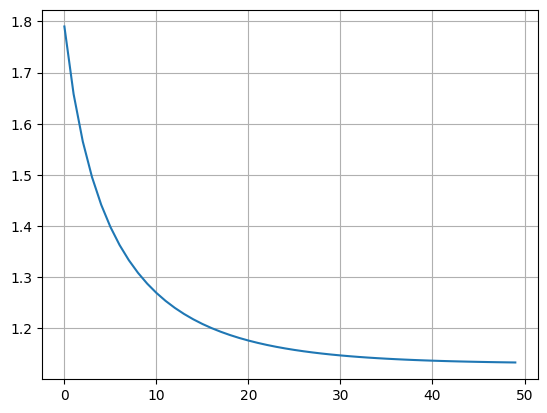

In [7]:
import matplotlib.pyplot as plt

plt.grid(True)
plt.plot(values)
plt.show()

You will notice that since we started from 2.0 which is near to the local minimum, the optimizer is trapped into the local minimum and we end up with solution of x = 1.13 after 50 iterations. This is a good value and a neural network with a local minimum will still work well, however, it is not the best solution.

Momentum is a factor that can help in pushing our optimizer to reach a better (and hopefully global) minimum value. We can set the momentum value in SGD optimizer (_Adam already incorporated momentum in its algorithm so you cannot set momentum for Adam_)

Modify the following line of codes

```python
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
```

to

```python
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.7)
```

The momentum pushes the optimizer out of 1.3 and towards the global minimum of -1.3 but unfortunately the push is not hard enough. After reaching below 0.6 it moved towards the local minimum again.Let us give it a stronger momentum, change the momentum from 0.7 to 0.8 and run the codes again.


This time, the momentum is strong enough for the optimizer to overcome the local minimum and succesfully reached the global minimum. Note that it oscillates a bit about the global minimum and eventually settles down.

## Regularization

Wr will use the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [8]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


As the samples are already randomly shuffled, we can take the first 50,000 as the training set and the other 10,000 as the validation set.

In [10]:
orig_train_images, orig_train_labels = train_images.copy(), train_labels.copy()
train_images, train_labels = orig_train_images[:50000], orig_train_labels[:50000]
val_images, val_labels = orig_train_images[50000:], orig_train_labels[50000:]
print(len(train_images), len(val_images))

50000 10000


The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255. Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

val_images = val_images / 255.0

We will now build the model. The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers.  The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a probability score that indicates how likely is the current image belongs to one of the 10 classes. We will use a softmax function to ensure the probability adds up to 1.0.

Fill up the code below and use appropriate activation function for each layer

In [12]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu')) # fill up the code
model.add(Dense(10, activation='softmax')) # fill up the code


/Users/siewweiheng/miniconda3/envs/adl-1/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Print the model summary.

In [13]:
#insert code here
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

We will now compile the model. During compilation, the following needs to be specified.

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction. Due to the way the output is encoded, we will be using sparse categorical crossentropy as the loss function.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function. In our case, we will just use Adam. 
* *Metrics* —Used to monitor the training and testing steps. In our case, we want to monitor *accuracy*, the fraction of the images that are correctly classified

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

We will now train the model for 30 epochs. We will also make use of Tensorboard callback to visualize the training progress.

In [15]:
# define the tensorboard callback 
import os

root_logdir = os.path.join(os.curdir, "tb_logs")

def get_run_logdir():    # use a new directory for each run
	import time
	run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
	return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

tb_callback = tf.keras.callbacks.TensorBoard(run_logdir)

In [16]:
model.fit(train_images, 
                    train_labels, 
                    validation_data = (val_images, val_labels), 
                    epochs=30,
                    callbacks=[tb_callback])

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.7765 - loss: 0.6450 - val_accuracy: 0.8370 - val_loss: 0.4480
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 766us/step - accuracy: 0.8594 - loss: 0.3901 - val_accuracy: 0.8555 - val_loss: 0.3889
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 871us/step - accuracy: 0.8739 - loss: 0.3475 - val_accuracy: 0.8717 - val_loss: 0.3606
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 837us/step - accuracy: 0.8837 - loss: 0.3149 - val_accuracy: 0.8739 - val_loss: 0.3503
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - accuracy: 0.8938 - loss: 0.2966 - val_accuracy: 0.8712 - val_loss: 0.3631
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.8935 - loss: 0.2849 - val_accuracy: 0.8801 - val_loss: 0.3377
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step - accuracy: 0.9019 - loss: 0.2661 - val_accuracy: 0.8803 - val_loss: 0.3322
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - accuracy: 0.9062 -

In [17]:
%load_ext tensorboard
%tensorboard --logdir tb_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.94 (or 94%) on the training data and about 0.89 (89%) on the validation data. Let us see how it performs on the test data.

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - 519us/step - accuracy: 0.8827 - loss: 0.4219

Test accuracy: 0.8827000260353088


What do you notice about the validation and test accuracies compared to the training accuracies?

You can save or load the model by using the code below.

In [19]:
model.save('fmnist_model.keras')
saved_model = tf.keras.models.load_model('fmnist_model.keras')

In [20]:
test_loss, test_acc = saved_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - 602us/step - accuracy: 0.8827 - loss: 0.4219

Test accuracy: 0.8827000260353088


Add in Dropout layer after each Dense layer and retrain the network. Compare the validation with the train accuracy. What do you observe? 

In [21]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu')) # fill up the code
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax')) # fill up the code

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, 
                    train_labels, 
                    validation_data = (val_images, val_labels), 
                    epochs=30)


Epoch 1/30


/Users/siewweiheng/miniconda3/envs/adl-1/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7428 - loss: 0.7297 - val_accuracy: 0.8433 - val_loss: 0.4302
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8460 - loss: 0.4263 - val_accuracy: 0.8590 - val_loss: 0.3810
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8599 - loss: 0.3904 - val_accuracy: 0.8655 - val_loss: 0.3635
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8650 - loss: 0.3704 - val_accuracy: 0.8676 - val_loss: 0.3649
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8664 - loss: 0.3587 - val_accuracy: 0.8741 - val_loss: 0.3453
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8758 - loss: 0.3367 - val_accuracy: 0.8769 - val_loss: 0.3330
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8783 - loss: 0.3281 - val_accuracy: 0.8745 - val_loss: 0.3436
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8819 - loss: 0.3203 - val_accurac

We can also use the early stopping callback to stop the training when there is o more improvement (for 5 epochs) in the validation accuracy. 
See the documentation on [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) 

In [22]:
earlystop_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', patience=5, verbose=0,
    mode='auto', restore_best_weights=True
)

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(train_images, train_labels, 
          validation_data=(val_images, val_labels),
          epochs=30,
          callbacks=[earlystop_callback])

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7730 - loss: 0.6574 - val_accuracy: 0.8565 - val_loss: 0.4038
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.8588 - loss: 0.3906 - val_accuracy: 0.8566 - val_loss: 0.3892
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step - accuracy: 0.8744 - loss: 0.3482 - val_accuracy: 0.8657 - val_loss: 0.3643
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - accuracy: 0.8848 - loss: 0.3155 - val_accuracy: 0.8769 - val_loss: 0.3460
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step - accuracy: 0.8857 - loss: 0.3101 - val_accuracy: 0.8788 - val_loss: 0.3295
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - accuracy: 0.8973 - loss: 0.2793 - val_accuracy: 0.8811 - val_loss: 0.3252
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.8995 - loss: 0.2678 - val_accuracy: 0.8754 - val_loss: 0.3448
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step - accuracy: 0.9034 - l

KeyboardInterrupt: 

In [23]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))) # fill up the code
model.add(Dense(10, activation='softmax')) # fill up the code

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, 
                    train_labels, 
                    validation_data = (val_images, val_labels), 
                    epochs=30)


Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 944us/step - accuracy: 0.7614 - loss: 1.3115 - val_accuracy: 0.8183 - val_loss: 0.6537
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - accuracy: 0.8091 - loss: 0.6619 - val_accuracy: 0.8074 - val_loss: 0.6541
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - accuracy: 0.8158 - loss: 0.6389 - val_accuracy: 0.8053 - val_loss: 0.6394
Epoch 4/30
1555/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.8222 - loss: 0.6199

KeyboardInterrupt: 